<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Ejercicio de clasificación con titanic dataset

Ejemplo de clasificación utilizando el dataset de titanic<br>

v1.1

In [2]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import keras
from keras import Sequential
from keras.models import Sequential
from keras.utils import to_categorical
# Si esto no funciona, probar con el import anterior

# Recolectar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle">

In [3]:
if os.access('titanic.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/titanic.csv > titanic.csv
    else:
        !wget titanic.csv https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/titanic.csv

--2025-02-10 03:41:18--  http://titanic.csv/
Resolving titanic.csv (titanic.csv)... failed: Name or service not known.
wget: unable to resolve host address ‘titanic.csv’
--2025-02-10 03:41:18--  https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [text/plain]
Saving to: ‘titanic.csv’

titanic.csv         100%[===================>]  59.76K  --.-KB/s    in 0.01s   

2025-02-10 03:41:18 (4.44 MB/s) - ‘titanic.csv’ saved [61194/61194]

FINISHED --2025-02-10 03:41:18--
Total wall clock time: 0.2s
Downloaded: 1 files, 60K in 0.01s (4.44 MB/s)


### `titanic.csv`:
El dataset **`titanic.csv`** contiene datos sobre los pasajeros que estuvieron en el titanic y si finalmente sobrevivieron o nó al viaje.<br>
- **Passengerid** --> id del pasajero, ejemplo 5
- **Survived** --> sobrevivió? 1(Si), 0(No)
- **Pclass** --> clase (1, 2, 3)
- **Name** --> nombre
- **Sex** --> genero, ejemplo male(masculino), female(femenino)
- **Age** --> edad
- **Siblings** --> Hermanos y esposas/esposos abordo
- **Parch** --> Hijos abordo
- **Ticket** --> Nº de ticket
- **Fare** --> tarifa del ticket
- **Cabine** --> Nº de cabina
- **Embarked** --> Puerto de embarque (C = Cherbourg; Q = Queenstown; S = Southampton)


# Procesar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle">

In [4]:
# Alumno, realice una inspeccion del dataset en búsqueda de elementos faltantes
df = pd.read_csv("titanic.csv")
des = df.describe()
des.loc['Nan'] = df.isna().sum()
des.loc['%Nan'] = (df.isna().mean())*100
des


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200
Nan,0.000000,0.000000,0.000000,177.000000,0.000000,0.000000,0.000000
%Nan,0.000000,0.000000,0.000000,19.865320,0.000000,0.000000,0.000000


In [5]:
# Alumno, inspeccione el dataset, visualice las columnas que posee y sus primeras filas
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Alumno, del dataset original cree uno nuevo pero
# unicamente con las siguientes columnas:
# Survived, Pclass, Sex, Age, SibSp, Parch
df2 = df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch']]

In [7]:
# Alumno, en caso de encontrarse elementos faltantes,
# elimine aquellas filas que tengan columnas vacias
# Escriba el procedimiento tenga o no elementos faltantes
df2 = df2.dropna()

In [8]:
# Alumno: Fin de la limpieza, especifique cuantas filas se poseen para analizar
df2.shape[0]

714

# Explorar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle">

In [9]:
# Alumno, inspeccione el dataset, visualice las columnas que posee y sus primeras filas
df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [10]:
# Alumno: Explorar que tan balanceado está el dataset,
# determinar cuantas personas sobrivivieron o no
df2['Survived'].value_counts()

,count
Survived,
0,424
1,290


<Axes: xlabel='Survived', ylabel='count'>

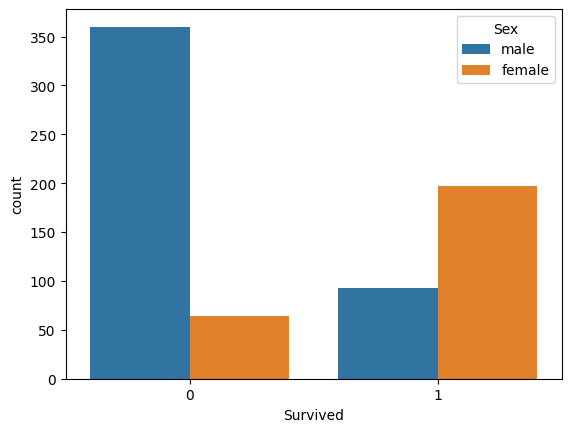

In [11]:
# Alumno: Determinar cuantas personas sobrevivieron
# diferenciando por género
# Utilice el gráfico de seaborn countplot con hue="Sex"
sns.countplot(x="Survived", hue="Sex", data=df2)

<Axes: xlabel='Pclass', ylabel='count'>

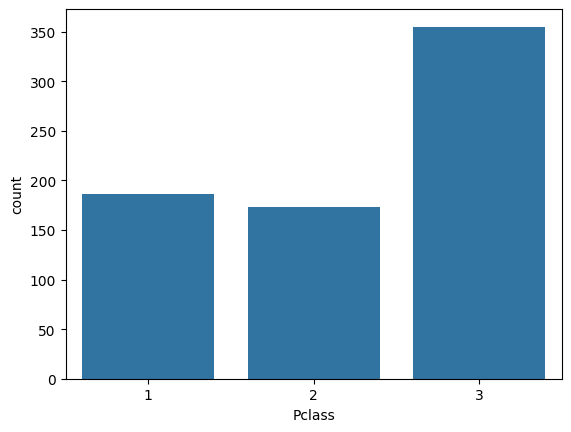

In [35]:
# Alumno: Determinar cuantas personas había de cada clase
# Utilice el gráfico de seaborn countplot
df2['Pclass'].value_counts()
sns.countplot(x="Pclass", data=df2)

<Axes: xlabel='Pclass', ylabel='count'>

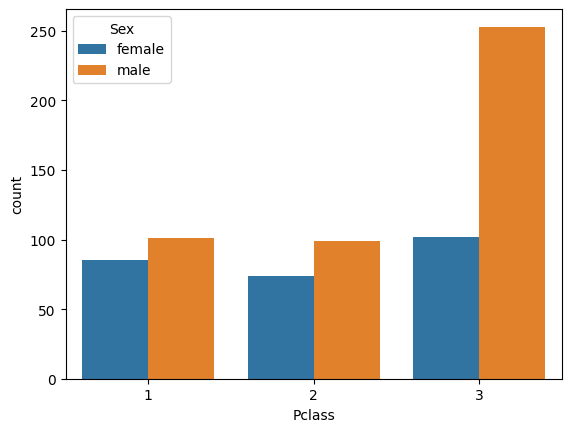

In [36]:
# Alumno: Determinar cuantas personas había de cada clase
# diferenciando por género
# Utilice el gráfico de seaborn countplot con hue="Sex"
sns.countplot(x="Pclass", hue="Sex", data=df2)

#### Transformar variables categóricas texto a clases numeradas

In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
# Alumno, cree un dataset df_cod como copia del que viene trabajando
df_cod = df2.copy()

In [40]:
# Utiliza el LabelEncoder para codificar la columna Sex, remplazando
# esa columna por la nueva en el dataset nuevo que acaba de generar
# Recuerde conservar el encoder!
le = LabelEncoder()
df_cod['Sex'] = le.fit_transform(df_cod['Sex'])

In [41]:
# Alumno,  imprimir las clases que ha detectado su encoder
# (debe llamar al atributo classes_)
le.classes_

array(['female', 'male'], dtype=object)

<Axes: >

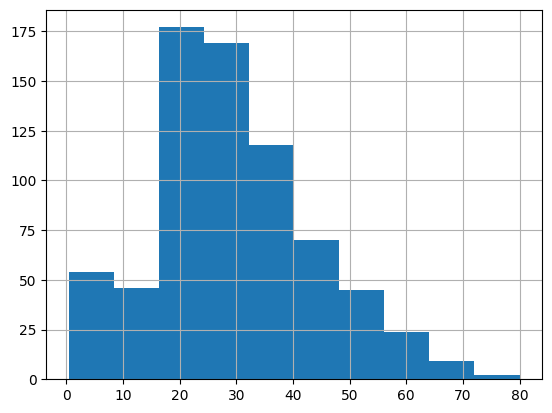

In [42]:
# Alumno: Analizar la distribución de la edad
df_cod['Age'].hist()

In [43]:
# Alumno, cree un dataset df_cod como copia del que viene trabajando
df_cod2 = df_cod.copy()

In [44]:
# Alumno: utilizar StandarScaler para normalizar la column de "Age"
# Conservar el scaler que lo necesitará para el final
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_cod2['Age'] = scaler.fit_transform(df_cod2[['Age']])

# Entrenar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle">

El primer paso es obtener los datos que serán la entrada del sistema (X) y los datos que serán la salida del modelo estimador (y)

In [45]:
# Alumno: genere un numpy array "X" que posea todos los feutres (todo menos Survived)
# genere un array numpy "y" de solo la columna Survived
X = df_cod2.drop('Survived', axis=1).values
y = df_cod2['Survived'].values


In [46]:
# Alumno: obtener la cantidad de features (cantidad de columnas)
# y almacenar en in_shape
in_shape = X.shape[1]

In [47]:
# Alumno: crear una variable out_shape indicando cuandas neuronas de salida desea
out_shape = 1

Siguiente paso es dividir el dataset en entrenamiento (train) y evaluación (test). Utilizaremos el criterio 80%20%

In [48]:
# Alumno, generar los dataset de train y test superando en 80%20%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
from keras.layers import Dense
# Alumno: crear un modelo secuencial de dos capas (hidden y output).
# Coloque correctamente el valor de in_shape y out_shape en el modelo
# pero seleccione por su cuenta la cantidad de neuronas en la capa oculta
model = Sequential()
model.add(Dense(10, input_dim=in_shape, activation='relu'))
model.add(Dense(out_shape, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [50]:
# Alumno: compilar el modelo con binary_crossentropy y métrica de "accuracy"
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [51]:
# Alumno: entrenar el modelo, seleccionar un 20% para el dataset de validacion
# Queda a su gusto seleccionar la cantidad de épocas
# Almacenar la salida del fit en una variable "history"
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5531 - loss: 0.6964 - val_accuracy: 0.5478 - val_loss: 0.6949
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5562 - loss: 0.6823 - val_accuracy: 0.5130 - val_loss: 0.6828
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6121 - loss: 0.6606 - val_accuracy: 0.5739 - val_loss: 0.6729
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5923 - loss: 0.6544 - val_accuracy: 0.5652 - val_loss: 0.6640
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6436 - loss: 0.6384 - val_accuracy: 0.5826 - val_loss: 0.6562
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6224 - loss: 0.6426 - val_accuracy: 0.5826 - val_loss: 0.6490
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6834 - loss: 0.6200 - val_accuracy: 0.6000 - val_loss: 0.6420
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6918 - loss: 0.6010 - val_accuracy: 0.6174 - 

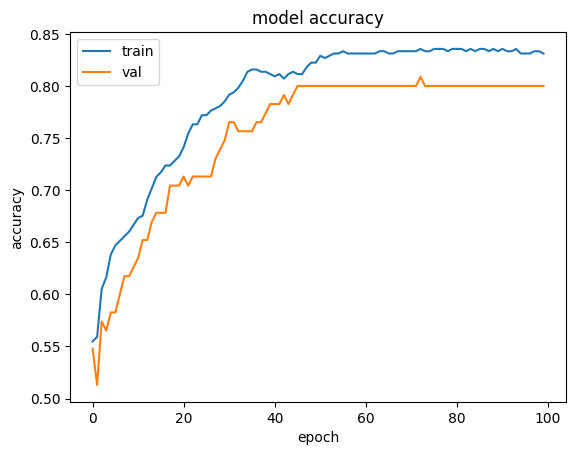

In [52]:
# Alumno: Graficar la evolución del accuracy durante el entrenamiento
# tanto para el dataset de train y el de valid en un gráfico
# plot line
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

In [53]:
# Alumno: obtener la probabilidad de sobreviir (y_hat_prob)
# realizando una prediccion (predict) con el dataset de test
y_hat_prob = model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


In [54]:
# Alumno: transformar las probabilidads en 0 y 1, si la probabilidad es
# mayor o igual a 0.5 definir que la persona sobrevivió (1)
# Estos valores guardarlos en y_hat
y_hat = np.where(y_hat_prob >= 0.5, 1, 0)

# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

In [55]:
# Alumno, calcular la exactitud (accuracy) de su modelo
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_hat)

0.7762237762237763

In [56]:
# Alumno, dibujar la matriz de confusion
# definir display_labels=['NO SOBREVIVE', 'SOBREVIVE']
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_hat)


# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">

In [58]:
# Alumno, pona a prueba el modelo, ingrese datos ficticios y divertase un rato :)
# Recordar que los datos de genero (Sex) ahora son numéricos para el modelo (0 o 1)
# Debe utilizar el encoder que se generó antes para convertir los nuevos valores
# Recordar que los datos de edad (Age) se normalizaron, debe utilizar ese
# scaler generado para transformarlo
Pclass = 1
Sex = 'male'
Age = 6
SibSp = 2
Parch = 0
sex_encoded = int(le.transform([Sex]))
age_norm = float(scaler.transform([[Age]]))
X_prueba = np.array([Pclass, sex_encoded, age_norm, SibSp, Parch])
X_prueba = X_prueba.reshape(1, -1)
y_prueba = float(model.predict(X_prueba))

if y_prueba >= 0.5:
    print('Sobrevivi!')
else:
    print('Game Over')

print('Probabilidad de haber sobrevivido:', y_prueba)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Game Over
Probabilidad de haber sobrevivido: 0.41767773032188416


<ipython-input-58-771864d4636a>:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex_encoded = int(le.transform([Sex]))
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-58-771864d4636a>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age_norm = float(scaler.transform([[Age]]))
<ipython-input-58-771864d4636a>:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before perf